In [73]:
%reload_ext autoreload
%autoreload 2

# Autograd

The `autograd` is an object-oriented implementation of the backpropagation algorithm. This notebook further describes its use. The interface and implementation of this module was inspired by the [Torch Autograd](https://pytorch.org/docs/stable/autograd.html) package. If you want to learn more about backpropagation and automatic differentiation, there are some good resources on the PyTorch website [\[1\]](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) [\[2\]](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html) as well as an excellent [minimal implementation by Andrej Karpathy](https://github.com/karpathy/micrograd).

In [74]:
from microai.autograd.core import Variable
from microai.autograd.utils import graph

## Example Use

At the moment, the `autograd` implementation works with regular Python numeric types.

In [75]:
x = Variable(2., label="x")
y = Variable(2., label="y")
z = Variable(3., label="z")
c = x + x**2 + y * z * x

### Properties

There are few properties you can access from a variable.

In [76]:
print(x.label) # prints label of the variable
print(x.data)  # prints value of c
print(x.grad)  # prints gradient of the variable, zero by default

x
2.0
0.0


### Backpropagation

Invoking `backward` will recurse and calculate gradients for each intermediate node.

In [77]:
c.backward()
print(x.grad) # dc/dx
print(y.grad) # dc/dy
print(z.grad) # dc/dz

11.0
6.0
4.0


### Visualization

For debugging purposes, you can render the computational graph using the providing utility function.

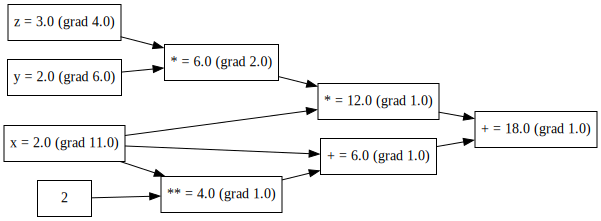

In [78]:
graph(c)

## Operators

The most common operators have been implemented as part of the `autograd.core` module.

In [79]:
def operators(x):
    y = x**2      # raising to the power
    y = y + 1     # constant addition
    z = y + x     # addition with another variable
    z = z + y * x # multiplication with another variable
    z = -z        # negation
    z += 15 / z   # true division with another variable
    z += z / 10   # true division with constant
    z += y/x      # true division with another variable
    return z

We can check the gradient calculation by comparing with PyTorch implementation.

In [80]:
import torch

x_torch = torch.tensor(10., requires_grad=True)
z_torch = operators(x_torch)
z_torch.backward()

x_autograd = Variable(10.0)
z_autograd = operators(x_autograd)
z_autograd.backward()

print(f"Autograd: {x_autograd.grad}")
print(f"Torch: {x_torch.grad}")

Autograd: -353.20577206218803
Torch: -353.2057800292969


## Architecture

The architecture of the `autograd` is rather simplistic, contained within a single module `autograd.core`. The central entity is the `Variable` class, which encapsulates data and defines operators on that data using [function overloading](https://docs.python.org/3/reference/datamodel.html). There are two key methods that comprise a variable: `_forward` and `_backward`. The former performs calculations described by the variable (if any) and sets its internal `_value` property. The latter calculates the local gradient and recursively propagates it to its children. Autograd is an object-oriented implementation of backpropagation, thus `Variable` class can be extended to implement different functionalities (e.g., see `AddVariable`, `MulVariable` and `PowVariable` implementations, which were sufficient to implement the rest of the functionalities).